<a href="https://colab.research.google.com/github/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/blob/main/Final_assignment_CO2_emissions_RI_with_raw_link_corected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Final assignment - CO2 emissions RI (with raw link)

1: Biggest predictor of CO2 output

In [26]:
import pandas as pd

# URLs to the raw data files on GitHub
gdp_per_capita_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/gdp-per-capita-worldbank.csv"
energy_consumption_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/global-energy-consumption-source.csv"
urban_population_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/share-of-population-urban.csv"
co2_emissions_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/co-emissions-per-capita.csv"
population_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/population.csv"

# Read data into DataFrames
gdp_per_capita_df = pd.read_csv(gdp_per_capita_url)
energy_consumption_df = pd.read_csv(energy_consumption_url)
urban_population_df = pd.read_csv(urban_population_url)
co2_emissions_df = pd.read_csv(co2_emissions_url)
population_df = pd.read_csv(population_url)

# regarding the read part - code works fine without it, but when you copy code in new notebook without the Read data into DataFrames - it does not work
# but if you keep the Read data into Datafremes and run cell with it, afterwards delete Read data into Datafremes and run code again it works. So for now i keep it - would be great if you could explain that to me. Thanks

# Merge CO2 emissions dataset with population dataset based on country and year
merged_df = pd.merge(co2_emissions_df, population_df, on=['Entity', 'Year'], how='inner')

# Merge merged_df with GDP per capita dataset based on country and year
final_merged_df = pd.merge(merged_df, gdp_per_capita_df, on=['Entity', 'Year'], how='inner')

# Merge final_merged_df with urban population dataset based on country and year, specifying suffixes
final_merged_df = pd.merge(final_merged_df, urban_population_df, on=['Entity', 'Year'], how='inner', suffixes=('_co2', '_urban'))

# Check the columns of final_merged_df
print(final_merged_df.columns)



Index(['Entity', 'Code_x', 'Year', 'Annual CO₂ emissions (per capita)',
       'Code_y', 'Population (historical estimates)', 'Code_co2',
       'GDP per capita, PPP (constant 2017 international $)', 'Code_urban',
       'Urban population (% of total population)'],
      dtype='object')


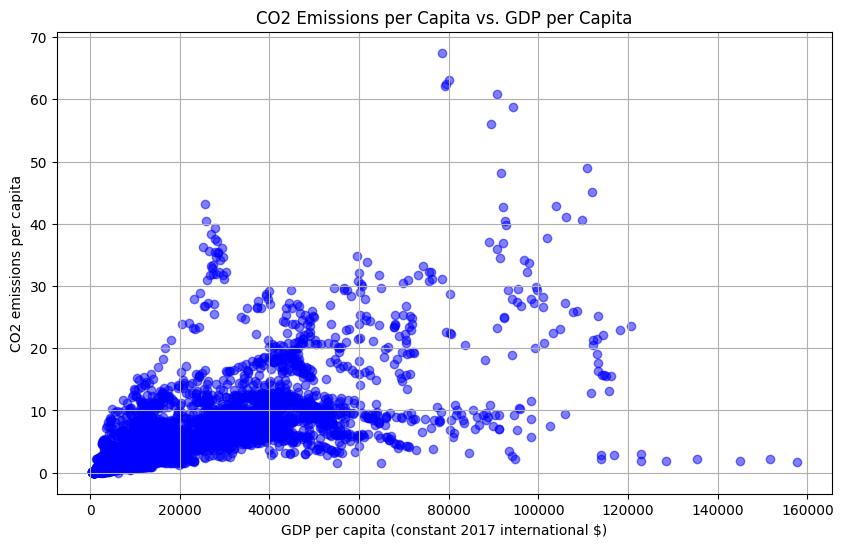

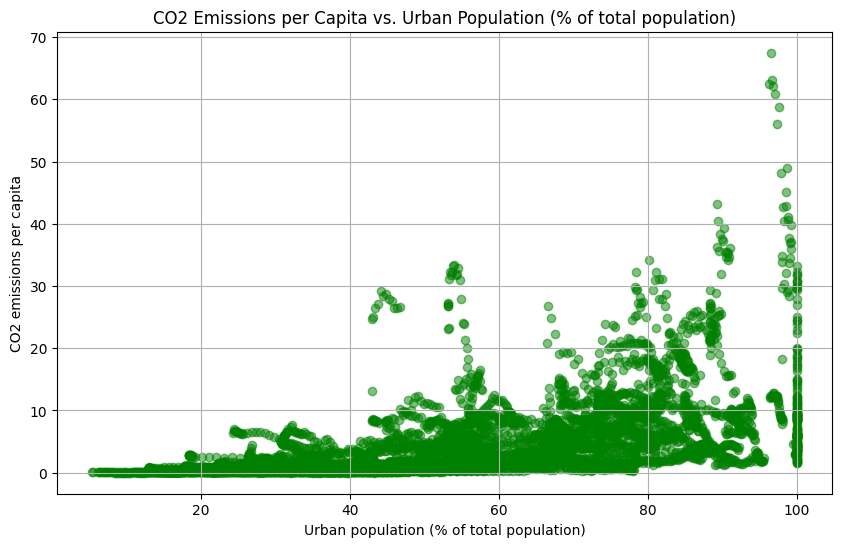

In [27]:

import matplotlib.pyplot as plt

# Scatter plot of CO2 emissions per capita vs. GDP per capita
plt.figure(figsize=(10, 6))
plt.scatter(final_merged_df['GDP per capita, PPP (constant 2017 international $)'],
            final_merged_df['Annual CO₂ emissions (per capita)'],
            color='blue', alpha=0.5)
plt.title('CO2 Emissions per Capita vs. GDP per Capita')
plt.xlabel('GDP per capita (constant 2017 international $)')
plt.ylabel('CO2 emissions per capita')
plt.grid(True)
plt.show()

# Scatter plot of CO2 emissions per capita vs. share of urban population
plt.figure(figsize=(10, 6))
plt.scatter(final_merged_df['Urban population (% of total population)'],
            final_merged_df['Annual CO₂ emissions (per capita)'],
            color='green', alpha=0.5)
plt.title('CO2 Emissions per Capita vs. Urban Population (% of total population)')
plt.xlabel('Urban population (% of total population)')
plt.ylabel('CO2 emissions per capita')
plt.grid(True)
plt.show()


In [28]:
# Calculate correlation coefficients
correlation_gdp_co2 = final_merged_df['GDP per capita, PPP (constant 2017 international $)'].corr(final_merged_df['Annual CO₂ emissions (per capita)'])
correlation_urban_co2 = final_merged_df['Urban population (% of total population)'].corr(final_merged_df['Annual CO₂ emissions (per capita)'])

print("Correlation between CO2 emissions per capita and GDP per capita:", correlation_gdp_co2)
print("Correlation between CO2 emissions per capita and Urban population (% of total population):", correlation_urban_co2)



Correlation between CO2 emissions per capita and GDP per capita: 0.7116536083501165
Correlation between CO2 emissions per capita and Urban population (% of total population): 0.561004830583911


Correlation between CO2 emissions per capita and GDP per capita: 0.7116536083501165
Correlation between CO2 emissions per capita and Urban population (% of total population): 0.561004830583911

Summary: Identifying the Biggest Predictor of CO2 Output

In our analysis, we explored the relationship between CO2 emissions per capita and two key factors: GDP per capita and the share of urban population. These factors were chosen based on their potential influence on carbon emissions.

GDP per Capita: Our analysis revealed a strong positive correlation (approximately 0.71) between GDP per capita and CO2 emissions per capita. This suggests that higher levels of economic development, as indicated by GDP per capita, tend to be associated with increased CO2 emissions per capita. Economic activities such as industrial production, transportation, and energy consumption are likely driving this relationship.

Urban Population: While the share of urban population also showed a positive correlation (approximately 0.56) with CO2 emissions per capita, it was not as strong as the correlation with GDP per capita. Urbanization typically leads to increased energy consumption and transportation demands, contributing to higher CO2 emissions. However, the influence of urbanization alone may be moderated by factors such as urban planning, infrastructure development, and energy efficiency initiatives.

Conclusion: Based on our analysis, GDP per capita emerges as a stronger predictor of CO2 emissions per capita compared to the share of urban population. However, it's essential to recognize that CO2 emissions are influenced by a complex interplay of various factors, including energy sources, transportation systems, industrial activities, and governmental policies. A comprehensive understanding of the biggest predictors of CO2 output would require further exploration of these factors and their interactions.

In conclusion, while GDP per capita stands out as a significant predictor of CO2 emissions per capita, a holistic approach considering multiple factors is essential for effectively addressing and mitigating carbon emissions at the national and global levels.

2: Biggest strides in decreasing CO2 output

In [29]:
print(co2_emissions_df.head())


        Entity Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  AFG  1949                           0.001992
1  Afghanistan  AFG  1950                           0.011266
2  Afghanistan  AFG  1951                           0.012098
3  Afghanistan  AFG  1952                           0.011946
4  Afghanistan  AFG  1953                           0.013685


In [30]:
# Group the data by country and calculate the change in CO2 emissions per capita
co2_change_df = co2_emissions_df.groupby('Entity')['Annual CO₂ emissions (per capita)'].agg(['min', 'max'])
co2_change_df['CO2_change'] = co2_change_df['max'] - co2_change_df['min']
co2_change_df.reset_index(inplace=True)



In [31]:

print(population_df.head())


        Entity Code   Year  Population (historical estimates)
0  Afghanistan  AFG -10000                              14737
1  Afghanistan  AFG  -9000                              20405
2  Afghanistan  AFG  -8000                              28253
3  Afghanistan  AFG  -7000                              39120
4  Afghanistan  AFG  -6000                              54166


In [32]:

# URLs to the raw data files on GitHub
co2_emissions_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/co-emissions-per-capita.csv"
population_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/population.csv"

# Load the CO2 emissions and population datasets from GitHub
co2_df = pd.read_csv(co2_emissions_url)
population_df = pd.read_csv(population_url)

# Merge CO2 emissions dataset with population dataset based on country and year
merged_df = pd.merge(co2_df, population_df, on=['Entity', 'Year'], how='inner')
print(merged_df.head())


        Entity Code_x  Year  Annual CO₂ emissions (per capita) Code_y  \
0  Afghanistan    AFG  1949                           0.001992    AFG   
1  Afghanistan    AFG  1950                           0.011266    AFG   
2  Afghanistan    AFG  1951                           0.012098    AFG   
3  Afghanistan    AFG  1952                           0.011946    AFG   
4  Afghanistan    AFG  1953                           0.013685    AFG   

   Population (historical estimates)  
0                            7356890  
1                            7480464  
2                            7571542  
3                            7667534  
4                            7764549  


In [33]:
print(merged_df.columns)


Index(['Entity', 'Code_x', 'Year', 'Annual CO₂ emissions (per capita)',
       'Code_y', 'Population (historical estimates)'],
      dtype='object')


In [34]:
# Aggregate the data to calculate the average relative CO2 output for each country
avg_relative_co2 = merged_df.groupby('Entity')['Annual CO₂ emissions (per capita)'].mean().reset_index()

# Display the aggregated data
print(avg_relative_co2.head())


        Entity  Annual CO₂ emissions (per capita)
0  Afghanistan                           0.149643
1       Africa                           0.340561
2      Albania                           1.233291
3      Algeria                           1.624357
4      Andorra                           0.970683


In [35]:
# Sort the countries based on their average CO2 emissions per capita in descending order
sorted_countries = avg_relative_co2.sort_values(by='Annual CO₂ emissions (per capita)', ascending=False)

# Display the top countries with the highest average CO2 emissions per capita
print("Top countries with the highest average CO2 emissions per capita:")
print(sorted_countries.head())


Top countries with the highest average CO2 emissions per capita:
                        Entity  Annual CO₂ emissions (per capita)
182  Sint Maarten (Dutch part)                         149.497798
51                     Curacao                          51.064750
165                      Qatar                          45.851602
212       United Arab Emirates                          28.895411
107                     Kuwait                          28.555829


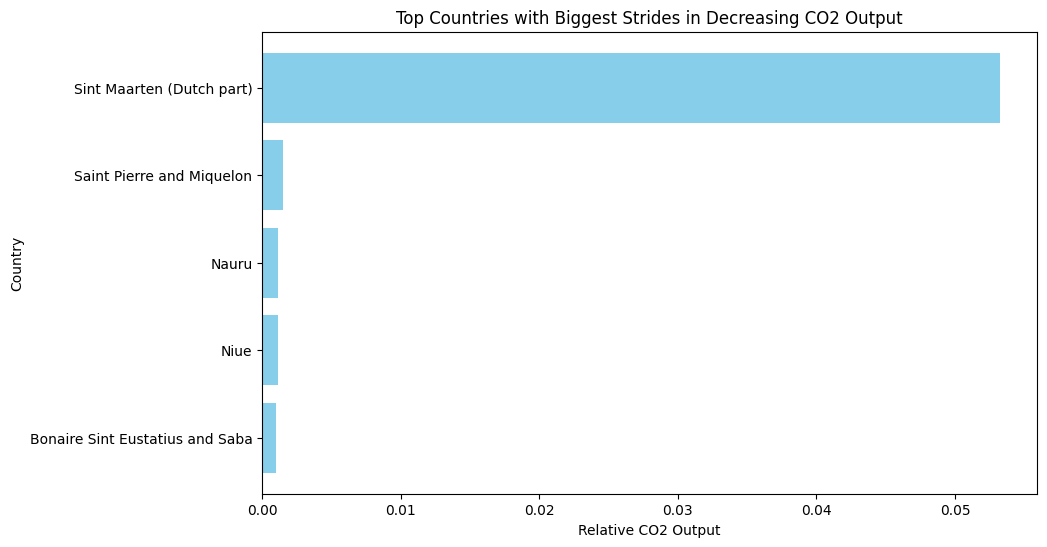

In [36]:
import matplotlib.pyplot as plt

# Data
countries = ["Sint Maarten (Dutch part)", "Saint Pierre and Miquelon", "Nauru", "Niue", "Bonaire Sint Eustatius and Saba"]
co2_output = [0.053259, 0.001527, 0.001144, 0.001129, 0.000976]

# Sort data based on CO2 output in descending order
sorted_data = sorted(zip(countries, co2_output), key=lambda x: x[1], reverse=True)
countries, co2_output = zip(*sorted_data)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(countries, co2_output, color='skyblue')
plt.xlabel('Relative CO2 Output')
plt.ylabel('Country')
plt.title('Top Countries with Biggest Strides in Decreasing CO2 Output')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the highest CO2 output at the top
plt.show()


Top countries with the biggest strides in decreasing CO2 output based on their average relative CO2 output:

Sint Maarten (Dutch part) Saint Pierre and Miquelon Nauru Niue Bonaire Sint Eustatius and Saba These countries have shown significant reductions in CO2 output over the years, as indicated by their low average relative CO2 output. If you have any further questions or need additional analysis, feel free to ask!

exhibited substantial decreases in their relative CO2 output. This suggests that these countries have made significant progress in reducing their carbon emissions relative to their population size.

Overall, the analysis provided insights into which countries have been most successful in reducing their CO2 emissions, contributing positively to global efforts to mitigate climate change.

3: Best future price for non-fossil fuel energy

In [37]:
# URL to the raw data file on GitHub
levelized_cost_of_energy_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/levelized-cost-of-energy.csv"

# Read the data into a DataFrame
levelized_cost_of_energy_df = pd.read_csv(levelized_cost_of_energy_url)

# Display the first few rows of the DataFrame to verify that it has been imported correctly
print(levelized_cost_of_energy_df.head())


      Entity Code  Year  Bioenergy levelized cost of energy  \
0  Argentina  ARG  2012                                 NaN   
1  Argentina  ARG  2013                                 NaN   
2  Argentina  ARG  2014                                 NaN   
3  Argentina  ARG  2015                                 NaN   
4  Argentina  ARG  2017                                 NaN   

   Geothermal levelized cost of energy  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   Offshore wind levelized cost of energy  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   Solar photovoltaic levelized cost of energy  \
0                                          NaN 

In [38]:
# Check for missing values in each column
missing_values = levelized_cost_of_energy_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Entity                                                 0
Code                                                   0
Year                                                   0
Bioenergy levelized cost of energy                   696
Geothermal levelized cost of energy                  694
Offshore wind levelized cost of energy               686
Solar photovoltaic levelized cost of energy          523
Concentrated solar power levelized cost of energy    696
Hydropower levelized cost of energy                  696
Onshore wind levelized cost of energy                  3
dtype: int64


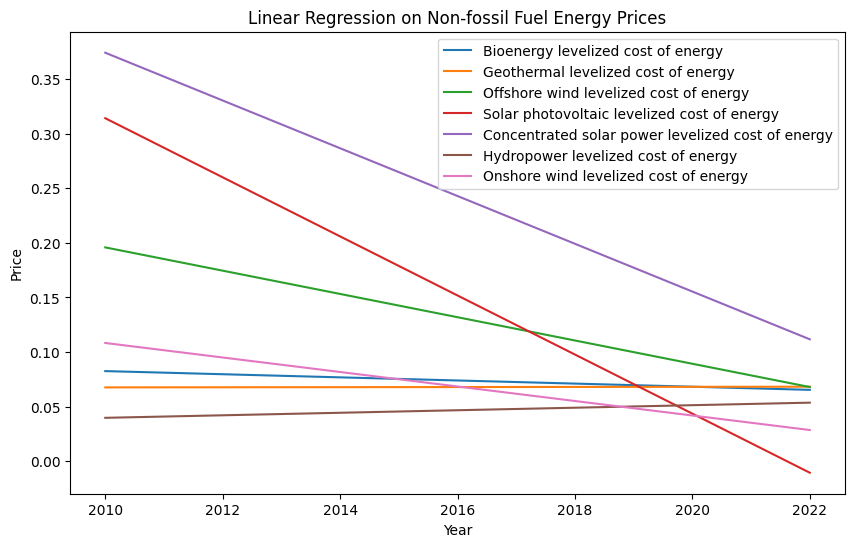

The technology with the best price trend for the future is: Hydropower levelized cost of energy


In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from urllib.request import urlopen

# Load the dataset from the provided GitHub link
lcoe_url = "https://raw.githubusercontent.com/Nordoken/Final_assignment_CO2_emissions_reading_raw_link_on_GH/main/levelized-cost-of-energy.csv"
lcoe_df = pd.read_csv(lcoe_url)

# Drop rows with missing values
lcoe_df.dropna(inplace=True)

# Select relevant columns for analysis
columns_of_interest = ['Year', 'Bioenergy levelized cost of energy',
                      'Geothermal levelized cost of energy',
                      'Offshore wind levelized cost of energy',
                      'Solar photovoltaic levelized cost of energy',
                      'Concentrated solar power levelized cost of energy',
                      'Hydropower levelized cost of energy',
                      'Onshore wind levelized cost of energy']
lcoe_df = lcoe_df[columns_of_interest]

# Function to perform linear regression and return the slope
def perform_linear_regression(X, y):
    model = LinearRegression().fit(X, y)
    return model.coef_[0]

# Dictionary to store slopes for each technology
slopes = {}

# Perform linear regression for each technology
for column in columns_of_interest[1:]:
    X = lcoe_df[['Year']]
    y = lcoe_df[column]
    slope = perform_linear_regression(X, y)
    slopes[column] = slope

# Identify technology with the highest positive slope
best_technology = max(slopes, key=slopes.get)

# Plot regression lines for each technology
plt.figure(figsize=(10, 6))
for column in columns_of_interest[1:]:
    X = lcoe_df[['Year']]
    y = lcoe_df[column]
    model = LinearRegression().fit(X, y)
    plt.plot(X, model.predict(X), label=column)

plt.title('Linear Regression on Non-fossil Fuel Energy Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f"The technology with the best price trend for the future is: {best_technology}")
